In this project, I answered for my friend challenge, to analyze the home burglaries complaints that took place in NYC during the years 2006 - 2017.

In [1]:
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('chesterish')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from calendar import month_abbr
%matplotlib inline

In [3]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv', low_memory=False)

df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,687626266,12/29/2018,15:00:00,NaN,NaN,44,01/06/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.834729,-73.911201,"(40.834728926000025, -73.91120061599996)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,F
1,263902856,01/04/2019,20:10:00,NaN,NaN,44,01/04/2019,351,CRIMINAL MISCHIEF & RELATED OF,254.0,...,F,NaN,40.829664,-73.917285,"(40.82966396200004, -73.917285253)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F
2,961160529,01/08/2019,19:00:00,01/09/2019,06:00:00,44,01/09/2019,107,BURGLARY,233.0,...,NaN,NaN,40.844116,-73.923061,"(40.84411612400004, -73.92306095399994)",PATROL BORO BRONX,NaN,45-64,WHITE HISPANIC,M
3,677728070,12/10/2018,09:00:00,01/10/2019,12:20:00,44,01/10/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,40.823794,-73.926159,"(40.823793548000026, -73.92615925299998)",PATROL BORO BRONX,NaN,25-44,BLACK HISPANIC,M
4,128150035,01/01/2019,13:00:00,01/01/2019,13:15:00,44,01/08/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,40.822861,-73.919165,"(40.82286114200008, -73.91916530199995)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171827 entries, 0 to 171826
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CMPLNT_NUM         171827 non-null  int64  
 1   CMPLNT_FR_DT       171822 non-null  object 
 2   CMPLNT_FR_TM       171827 non-null  object 
 3   CMPLNT_TO_DT       88669 non-null   object 
 4   CMPLNT_TO_TM       88741 non-null   object 
 5   ADDR_PCT_CD        171827 non-null  int64  
 6   RPT_DT             171827 non-null  object 
 7   KY_CD              171827 non-null  int64  
 8   OFNS_DESC          171268 non-null  object 
 9   PD_CD              171706 non-null  float64
 10  PD_DESC            171706 non-null  object 
 11  CRM_ATPT_CPTD_CD   171827 non-null  object 
 12  LAW_CAT_CD         171827 non-null  object 
 13  BORO_NM            171589 non-null  object 
 14  LOC_OF_OCCUR_DESC  123811 non-null  object 
 15  PREM_TYP_DESC      171468 non-null  object 
 16  JU

In [5]:
# there are 5 null values in the 'date of occurence' column , I have no use of them 
#therfore i will remove them .

df = df[df['CMPLNT_FR_DT'].isna() == False]

In [6]:
#for more analysis i will create a new columns of year and month separately

df['YEAR'] = df['CMPLNT_FR_DT'].apply(lambda x: x.split('/')[-1])
df['MONTH'] = df['CMPLNT_FR_DT'].apply(lambda x: x.split('/')[0])

In [7]:
#lets check for the years in which the data is documented in 

df['YEAR'].unique()

array(['2018', '2019', '2017', '2016', '2007', '2014', '2012', '2015',
       '2010', '2009', '2011', '1998', '2013', '1991', '2002', '2008',
       '2001', '1999', '2000', '1996', '2004', '1989', '1018', '2006',
       '2005', '2003', '1917', '1017', '1993', '1995', '1973', '1966',
       '1994', '1997', '1992', '1968', '1986', '1974', '1976'],
      dtype=object)

There is data from before 2006, but there shouldn't be, so it must be a mistake. Also, there is data from 2018 and 2019 that was updated lately so it is actually valid data that we can use but I will just ignore it for purpose of the exercise.

In [8]:
df = df[df['YEAR'].apply(int).isin(range(2006, 2018))]

After reading the column descriptions, we can explore and find a way to get all the data related to home burglaries

In [9]:
df['OFNS_DESC'].unique()

array(['CRIMINAL MISCHIEF & RELATED OF', 'FORGERY', 'SEX CRIMES',
       'GRAND LARCENY', 'PETIT LARCENY', 'RAPE', 'FELONY ASSAULT',
       'THEFT-FRAUD', 'HARRASSMENT 2', 'OFF. AGNST PUB ORD SENSBLTY &',
       'MISCELLANEOUS PENAL LAW', 'NYS LAWS-UNCLASSIFIED FELONY',
       'ASSAULT 3 & RELATED OFFENSES', 'KIDNAPPING', 'DANGEROUS DRUGS',
       'DANGEROUS WEAPONS', 'GRAND LARCENY OF MOTOR VEHICLE',
       'THEFT OF SERVICES', 'OFFENSES AGAINST PUBLIC ADMINI', 'BURGLARY',
       'FRAUDS', 'OFFENSES RELATED TO CHILDREN', 'ROBBERY',
       'CRIMINAL TRESPASS', 'OFFENSES AGAINST THE PERSON', nan,
       'INTOXICATED & IMPAIRED DRIVING',
       'MURDER & NON-NEGL. MANSLAUGHTER',
       'OFFENSES AGAINST PUBLIC SAFETY', 'VEHICLE AND TRAFFIC LAWS',
       'PROSTITUTION & RELATED OFFENSES', 'ARSON',
       'POSSESSION OF STOLEN PROPERTY', 'OFFENSES INVOLVING FRAUD',
       'OTHER OFFENSES RELATED TO THEF', 'OTHER STATE LAWS (NON PENAL LA',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', "BUR

From a quick look at the unique description of the type of the crimes we can see there are two types that are related to burglaries - burglary and burglarys tool 

now lets check where are the burglaries are taking place,using PREM_TYPE_DESC column.

In [10]:
df['PREM_TYP_DESC'].unique()

array(['TRANSIT - NYC SUBWAY', 'MAILBOX OUTSIDE',
       'RESIDENCE - APT. HOUSE', 'CHAIN STORE', 'COMMERCIAL BUILDING',
       'STREET', 'RESIDENCE-HOUSE', 'RESIDENCE - PUBLIC HOUSING',
       'TELECOMM. STORE', 'MAILBOX INSIDE', 'PARKING LOT/GARAGE (PUBLIC)',
       'PARKING LOT/GARAGE (PRIVATE)', 'PUBLIC BUILDING',
       'HOMELESS SHELTER', 'CHECK CASHING BUSINESS', 'DEPARTMENT STORE',
       'FAST FOOD', 'DRUG STORE', 'OPEN AREAS (OPEN LOTS)',
       'PUBLIC SCHOOL', 'BANK', 'LIQUOR STORE', 'OTHER', 'GROCERY/BODEGA',
       'BAR/NIGHT CLUB', 'BEAUTY & NAIL SALON', 'HIGHWAY/PARKWAY',
       'CLOTHING/BOUTIQUE', 'FOOD SUPERMARKET', 'PARK/PLAYGROUND',
       'HOSPITAL', 'GAS STATION', nan, 'DRY CLEANER/LAUNDRY',
       'RESTAURANT/DINER', 'TAXI (LIVERY LICENSED)', 'VARIETY STORE',
       'SHOE', 'BUS (OTHER)', 'STORE UNCLASSIFIED', 'SOCIAL CLUB/POLICY',
       'BUS (NYC TRANSIT)', 'BOOK/CARD', 'CONSTRUCTION SITE',
       'GYM/FITNESS FACILITY', 'CHURCH', 'SMALL MERCHANT', 'TUNNEL',
 

In [11]:
df[(df['OFNS_DESC'] == 'BURGLARY')|(df['OFNS_DESC'] == "BURGLAR'S TOOLS")]['PREM_TYP_DESC'].unique()

array(['RESIDENCE - APT. HOUSE', 'GROCERY/BODEGA',
       'RESIDENCE - PUBLIC HOUSING', 'COMMERCIAL BUILDING',
       'CONSTRUCTION SITE', 'PARK/PLAYGROUND', 'OTHER', 'FAST FOOD',
       'RESIDENCE-HOUSE', 'PARKING LOT/GARAGE (PRIVATE)',
       'TRANSIT - NYC SUBWAY', 'STREET', 'CHURCH', 'ATM',
       'STORAGE FACILITY', 'GAS STATION', 'BAR/NIGHT CLUB',
       'TELECOMM. STORE', 'BEAUTY & NAIL SALON', 'FACTORY/WAREHOUSE',
       'CHAIN STORE', 'FOOD SUPERMARKET', 'DEPARTMENT STORE',
       'PUBLIC BUILDING', 'HOSPITAL', 'RESTAURANT/DINER', 'LIQUOR STORE',
       'VARIETY STORE', 'BANK', 'DRUG STORE',
       'PARKING LOT/GARAGE (PUBLIC)', 'DOCTOR/DENTIST OFFICE',
       'DRY CLEANER/LAUNDRY', 'PUBLIC SCHOOL', 'STORE UNCLASSIFIED',
       'OPEN AREAS (OPEN LOTS)', 'CLOTHING/BOUTIQUE', 'SMALL MERCHANT',
       'CANDY STORE', 'TUNNEL', 'BRIDGE', 'SHOE', 'MARINA/PIER',
       'PRIVATE/PAROCHIAL SCHOOL', nan, 'CHECK CASHING BUSINESS',
       'HIGHWAY/PARKWAY', 'ABANDONED BUILDING', 'SOCIAL C

What we are interstesd in, is the burglaries who took place in houses, therfore I will adress a new DataFrame which shows exactly this. 
I will do so by using specific descrepition from the PREM_TYP_DESC column.

In [12]:
new_df = df[df['OFNS_DESC'].isin(['BURGLARY', "BURGLAR'S TOOLS"])][df['PREM_TYP_DESC']=='RESIDENCE - APT. HOUSE']
new_df.head(2)

<ipython-input-12-833d27d19810>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_df = df[df['OFNS_DESC'].isin(['BURGLARY', "BURGLAR'S TOOLS"])][df['PREM_TYP_DESC']=='RESIDENCE - APT. HOUSE']


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR,MONTH
13817,311426381,11/09/2017,23:15:00,03/02/2018,16:30:00,44,03/28/2018,107,BURGLARY,224.0,...,40.836678,-73.915596,"(40.836678228, -73.915596087)",PATROL BORO BRONX,NaN,25-44,WHITE HISPANIC,F,2017,11
15426,640672190,11/14/2017,01:50:00,03/04/2018,20:30:00,44,03/04/2018,107,BURGLARY,224.0,...,40.832161,-73.912715,"(40.832161029, -73.912714536)",PATROL BORO BRONX,NaN,65+,BLACK,F,2017,11


Now I wil create a another DataFrame from the new_df, it will be grouped by the month and year columns i've created earlier and also be added a datetime object as an index.

In [13]:
grouped_df = new_df.groupby(['YEAR', 'MONTH'])['CMPLNT_NUM'].count().to_frame().reset_index()
grouped_df.rename(columns={'CMPLNT_NUM': 'TOTAL_HOME_BURGLARIES'}, inplace=True)

grouped_df['datetime'] = (grouped_df['YEAR'] + grouped_df['MONTH']).apply(lambda x: datetime.datetime.strptime(x, '%Y%m'))
grouped_df.set_index('datetime', inplace=True)

grouped_df

,YEAR,MONTH,TOTAL_HOME_BURGLARIES
datetime,,,
2006-01-01,2006,01,15
2006-02-01,2006,02,8
2006-03-01,2006,03,7
2006-04-01,2006,04,14
2006-05-01,2006,05,15
...,...,...,...
2017-08-01,2017,08,11
2017-09-01,2017,09,8
2017-10-01,2017,10,13


Lets make similar adjustments on the original DataFrame in order to make new column that might help me understand things better.

In [14]:
df['datetime'] = (df['YEAR'] + df['MONTH']).apply(lambda x: datetime.datetime.strptime(x, '%Y%m'))
df.set_index('datetime', inplace=True)
grouped_df['TOTAL_CRIME'] = df.groupby('datetime')['CMPLNT_NUM'].count().to_frame()['CMPLNT_NUM']

In [15]:
grouped_df

,YEAR,MONTH,TOTAL_HOME_BURGLARIES,TOTAL_CRIME
datetime,,,,
2006-01-01,2006,01,15,1130
2006-02-01,2006,02,8,1013
2006-03-01,2006,03,7,1116
2006-04-01,2006,04,14,1095
2006-05-01,2006,05,15,1114
...,...,...,...,...
2017-08-01,2017,08,11,1065
2017-09-01,2017,09,8,939
2017-10-01,2017,10,13,978


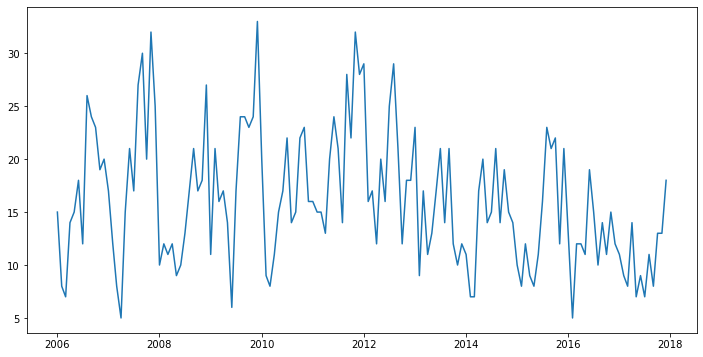

In [16]:
 #lts the amount of burglaries took place in relavant dates.
fig = plt.figure(figsize=(12, 6))

plt.plot(grouped_df.index, grouped_df['TOTAL_HOME_BURGLARIES'])

<AxesSubplot:xlabel='TOTAL_HOME_BURGLARIES', ylabel='TOTAL_CRIME'>

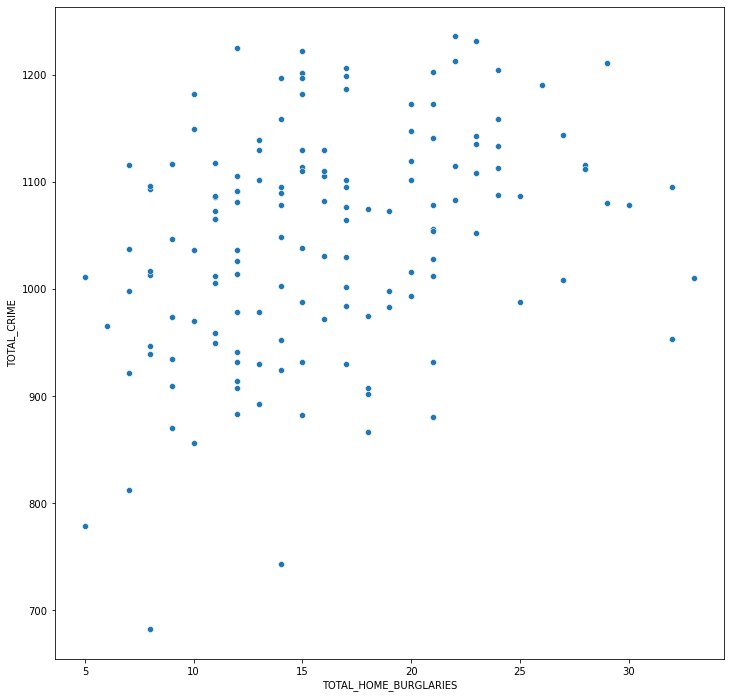

In [17]:
fig=plt.figure(figsize=(12, 12))

sns.scatterplot(data=grouped_df, x='TOTAL_HOME_BURGLARIES', y='TOTAL_CRIME')

<AxesSubplot:xlabel='MONTH'>

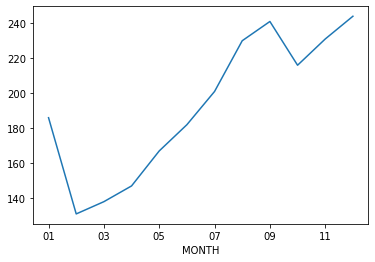

In [18]:
#lets check to see whts happen to amount of home burglaries while looking per month
grouped_df.groupby('MONTH').sum()['TOTAL_HOME_BURGLARIES'].plot()

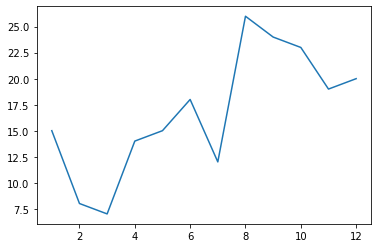

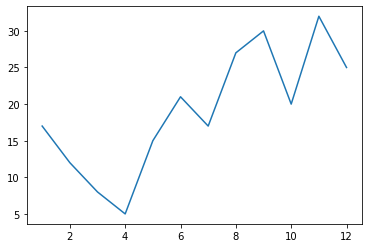

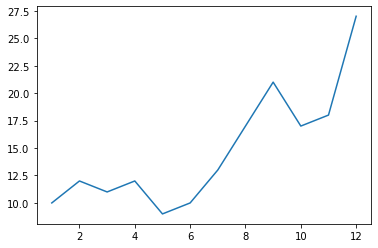

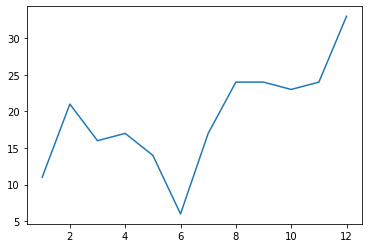

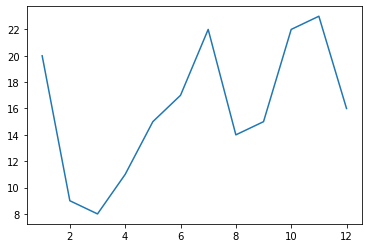

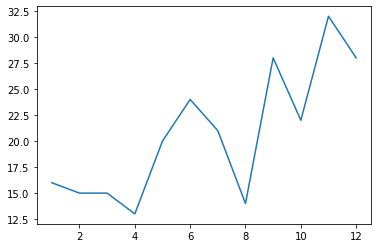

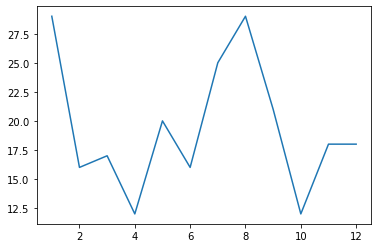

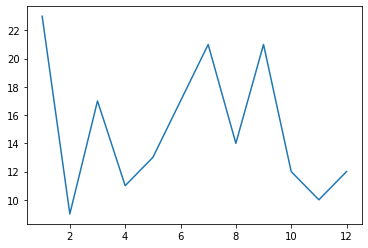

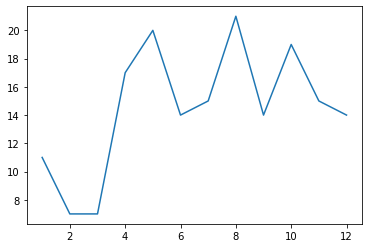

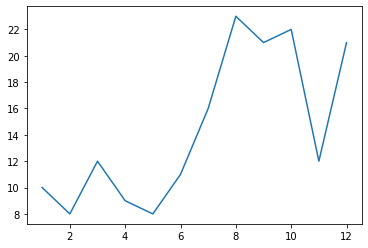

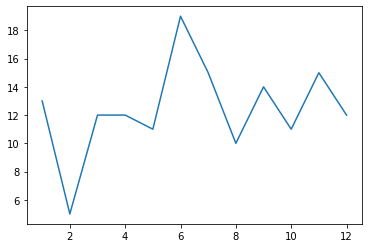

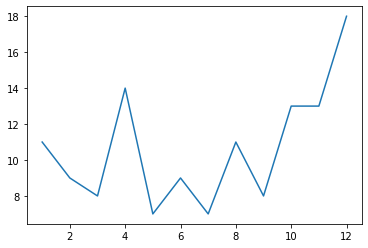

In [19]:
for i, year in enumerate(grouped_df['YEAR'].unique(), 1):
    plt.figure(i)
    plt.plot(grouped_df[grouped_df['YEAR'] == year]['MONTH'].apply(int), grouped_df[grouped_df['YEAR'] == year]['TOTAL_HOME_BURGLARIES'])

Looks like there may be a correlation between the month of the year and the total amount of home burglaries on that month, and it makes sense since if there are months with holidays, people might be far from home for a while, and if there are some rainy months, people mostly spend their time in their houses.

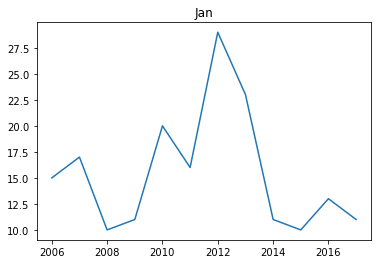

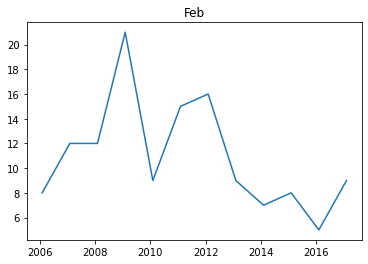

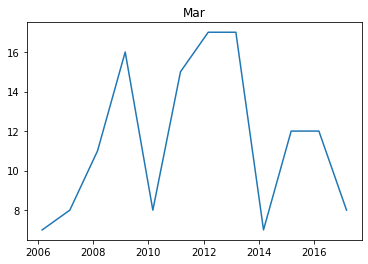

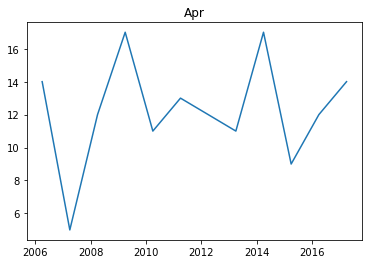

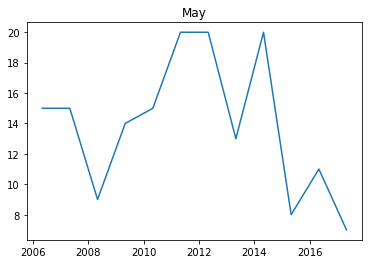

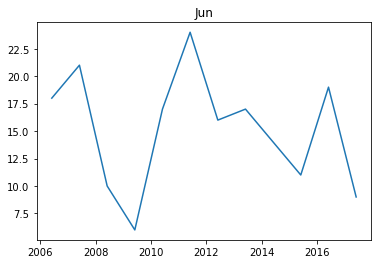

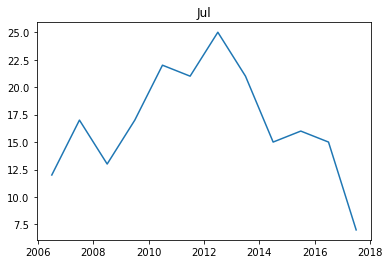

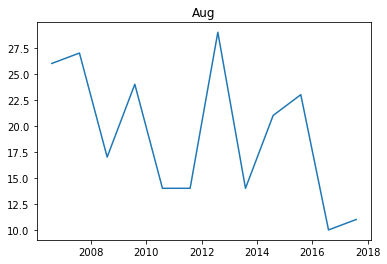

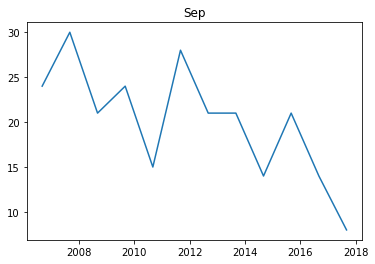

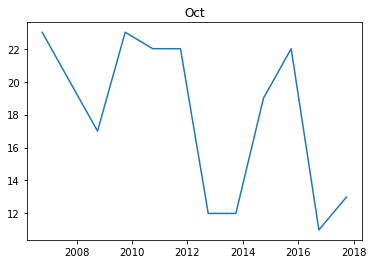

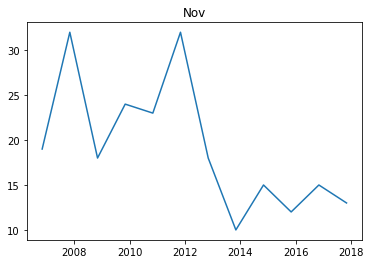

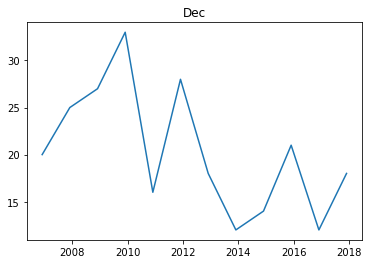

In [20]:
month_corr_dict = {}
for month in grouped_df['MONTH'].unique():
    month_corr_dict[month] = grouped_df[grouped_df['MONTH'] == month]
    
for i, month in enumerate(month_corr_dict.keys(), 1):
    plt.figure(i)
    plt.title(month_abbr[i])
    plt.plot(month_corr_dict[month]['TOTAL_HOME_BURGLARIES'])